In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import sklearn.metrics as metrics
from sklearn.impute import KNNImputer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm

# **Linear Regression**

In [ ]:
df = pd.read_csv('NBA Data.csv')                 # open a csv file in pandas
df.describe()                                    # statistical details about the dataset
df.head(10)                                      # see header row and top rows (specified in argument)

FileNotFoundError: ignored

In [ ]:
df[['Playoffs','W']]                            # select multiple columns by name (requires double brackets)
df.groupby('Playoffs')['W'].mean()              # group by the column passed as argument, (optional) only returning column in brackets, with aggregation function applied
df['PTSDiff'] = df['PTS'] - df['oppPTS']        # create a new column based on the specified logic (difference of two other columns)
df.plot.scatter('PTSDiff','W')                  # create a scatterplot of x,y with optional s (size) and c (color)

In [ ]:
x = df[['2PA','3PA','FTA','AST','ORB','DRB','TOV','STL']].values          # a 2d array is needed (either from multiple columns or using reshape)                          
y = df['PTS'].values.reshape(-1,1)                                        # "values" takes the pandas series object and extracts a numpy array  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)   # split the data into train/test sets with 25% going to test
lrm = LinearRegression()                                                  # initialize linear regression model
points_reg = lrm.fit(x_train, y_train)                                    # train the model on the test data set
print(f'alpha: {points_reg.intercept_}, \nbetas: {points_reg.coef_}')

In [ ]:
points_pred = points_reg.predict(x_test)                                  # predict points based on the test dataset 
scores = {'RMSE':math.sqrt(metrics.mean_squared_error(y_test,points_pred)),'R2':metrics.r2_score(y_test,points_pred)}
for score in scores:
  print(f'{score}: {round(scores[score],2)}')

In [ ]:
sm.OLS(y_train,sm.add_constant(x_train)).fit().summary2()                 # statsmodels provides the summary statistics that are lacking from sklearn
                                                                          # "add_constant" is needed to ensure the regression has a constant

# **Logistic Regression**

In [ ]:
df = pd.read_csv('Polling Data.csv')                 # open a csv file in pandas
df.head(10)                                      # see header row and top rows (specified in argument)
df.describe()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145.000000,99.000000,74.000000,145.000000,145.000000,145.000000
mean,2007.862069,0.040404,-0.824324,-1.268966,0.525943,0.510345
std,3.245982,13.426990,14.257282,6.353318,0.466495,0.501626
min,2004.000000,-41.000000,-33.000000,-19.000000,0.000000,0.000000
25%,2004.000000,-8.000000,-11.750000,-6.000000,0.000000,0.000000
50%,2008.000000,1.000000,-2.000000,1.000000,0.625000,1.000000
75%,2012.000000,8.500000,8.000000,4.000000,1.000000,1.000000
max,2012.000000,39.000000,30.000000,11.000000,1.000000,1.000000


In [ ]:
df_indep = df[['Rasmussen','SurveyUSA','DiffCount','PropR']]        # isolate the independent variables so the imputation doesn't take into account the "result" variable
knn = KNNImputer()                                                  # by default, targets "np.nan" as missing_values; can take number of neighbors to use for prediction (Default 5); copy of data created by default
new = knn.fit_transform(df_indep[['Rasmussen','SurveyUSA']])        # fit and transform the KNN values in; if working only on one column, would have to reshape to a 2D array
new = pd.DataFrame(new,columns=['Rasmussen','SurveyUSA'])           # transform back from np array into pd dataframe

In [ ]:
df['Rasmussen'] = new['Rasmussen']
df['SurveyUSA'] = new['SurveyUSA']
df.describe()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,2007.862069,0.367259,-0.279683,-1.268966,0.525943,0.510345
std,3.245982,11.737290,12.284499,6.353318,0.466495,0.501626
min,2004.000000,-41.000000,-33.000000,-19.000000,0.000000,0.000000
25%,2004.000000,-6.000000,-8.400000,-6.000000,0.000000,0.000000
50%,2008.000000,0.040404,-0.824324,1.000000,0.625000,1.000000
75%,2012.000000,7.000000,8.000000,4.000000,1.000000,1.000000
max,2012.000000,39.000000,30.000000,11.000000,1.000000,1.000000


In [ ]:
train = df.loc[df['Year'].isin([2004,2008])]              # select rows where column value matches specific values
test = df.loc[df['Year'] == 2012]

In [ ]:
ras_sign = np.sign(train['Rasmussen']).values                              # return the sign of the value in the column
ras_sign = pd.DataFrame(ras_sign,columns=['Rasmussen Sign'])
train2 = pd.concat([ras_sign.reset_index(),train.reset_index()],axis=1)    # join two dataframes along axis 1 (columns/side by side); reset index may be needed
train2.groupby(['Rasmussen Sign','Republican']).count()                    # FIX THIS

index  index  State  Year  Rasmussen  SurveyUSA  \
Rasmussen Sign Republican                                                    
-1.0           0              37     37     37    37         37         37   
 0.0           0               1      1      1     1          1          1   
               1               1      1      1     1          1          1   
 1.0           0               9      9      9     9          9          9   
               1              52     52     52    52         52         52   

                           DiffCount  PropR  
Rasmussen Sign Republican                    
-1.0           0                  37     37  
 0.0           0                   1      1  
               1                   1      1  
 1.0           0                   9      9  
               1                  52     52

In [ ]:
train[['Rasmussen','SurveyUSA','PropR','DiffCount','Republican']].corr()                                       # compute a correlation matrix

,Rasmussen,SurveyUSA,PropR,DiffCount,Republican
Rasmussen,1.000000,0.922902,0.751986,0.516330,0.721995
SurveyUSA,0.922902,1.000000,0.800977,0.590371,0.766993
PropR,0.751986,0.800977,1.000000,0.827379,0.948420
DiffCount,0.516330,0.590371,0.827379,1.000000,0.809278
Republican,0.721995,0.766993,0.948420,0.809278,1.000000


In [ ]:
reg = LogisticRegression()                                           # create an instance of a LogisticRegression object
reg.fit(train['PropR'].values.reshape(-1,1),train['Republican'])     # takes 2D arrays for x
y_pred = reg.predict(test['PropR'].values.reshape(-1,1))             # takes 2D arrays for x
y_true = test['Republican']
print(f'Model: Accuracy: {metrics.accuracy_score(y_true,y_pred)}, precision: {metrics.average_precision_score(y_true,y_pred)}')
print(metrics.confusion_matrix(y_true,y_pred))                       # confusion matrix

Model: Accuracy: 0.9777777777777777, precision: 0.9545454545454546
[[23  1]
 [ 0 21]]


In [ ]:
logit_train = train['PropR']
sm.Logit(train['Republican'],sm.add_constant(logit_train)).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.078862
         Iterations 9


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.886     
Dependent Variable: Republican       AIC:              19.7723   
Date:               2022-04-30 02:36 BIC:              24.9827   
No. Observations:   100              Log-Likelihood:   -7.8862   
Df Model:           1                LL-Null:          -69.135   
Df Residuals:       98               LLR p-value:      1.7970e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const    -6.1462     1.9773   -3.1083   0.0019   -10.0217   -2.2707
PropR    11.3904     3.1525    3.6131   0.0003     5.2116   17.5693
=================================================================

"""

# **Classification and Regression Trees (CART)**

In [ ]:
df = pd.read_csv('Stevens Judge.csv')                 # open a csv file in pandas
df.info()                                             # high level overview of columns, type and data counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Docket      566 non-null    object
 1   Term        566 non-null    int64 
 2   Circuit     566 non-null    object
 3   Issue       566 non-null    object
 4   Petitioner  566 non-null    object
 5   Respondent  566 non-null    object
 6   LowerCourt  566 non-null    object
 7   Unconst     566 non-null    int64 
 8   Reverse     566 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 39.9+ KB


*OneHot Encoding*: good for unordered variables - each label will be converted to binary variables (e.g. dog, cat, turtle) that are either on or off. This will also make the variable count grow.

*Label Encoding*: good for ordinal variables - each label will be converted to ascending integers, so there will be an order imposed (e.g. child, teenager, YA, adult)

In [ ]:
df['Circuit'].unique()                                    # get unique values from a column
indep_var = df.iloc[:,2:8]                                # iloc provides integer location based indexing for selection by position (like numpy arrays)  
indep_var = pd.get_dummies(indep_var)                     # get dummies is the same as OneHot ENcoding in sklearn 

In [ ]:
x = indep_var                       
y = df['Reverse']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=30)      # create an instance of the DTC class object; arguments are passed to when creating the instance
model = dtc.fit(x_train,y_train)                       # train the model using training data; does not accept strings 
y_pred = dtc.predict(x_test)                           # create classification predictions using the test data
y_score = model.predict_proba(x_test)                  # create probability of classification prredictions using test data

[Text(0.6, 0.9, 'LowerCourt_liberal <= 0.5\ngini = 0.499\nsamples = 396\nvalue = [190, 206]'),
 Text(0.4, 0.7, 'Respondent_STATE <= 0.5\ngini = 0.44\nsamples = 196\nvalue = [64, 132]'),
 Text(0.3, 0.5, 'Respondent_US <= 0.5\ngini = 0.462\nsamples = 166\nvalue = [60, 106]'),
 Text(0.2, 0.3, 'Petitioner_OTHER <= 0.5\ngini = 0.441\nsamples = 125\nvalue = [41, 84]'),
 Text(0.1, 0.1, 'gini = 0.451\nsamples = 70\nvalue = [24, 46]'),
 Text(0.3, 0.1, 'gini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.4, 0.3, 'gini = 0.497\nsamples = 41\nvalue = [19, 22]'),
 Text(0.5, 0.5, 'gini = 0.231\nsamples = 30\nvalue = [4, 26]'),
 Text(0.8, 0.7, 'Issue_CriminalProcedure <= 0.5\ngini = 0.466\nsamples = 200\nvalue = [126, 74]'),
 Text(0.7, 0.5, 'Circuit_9th <= 0.5\ngini = 0.479\nsamples = 164\nvalue = [99, 65]'),
 Text(0.6, 0.3, 'Respondent_OTHER <= 0.5\ngini = 0.463\nsamples = 121\nvalue = [77, 44]'),
 Text(0.5, 0.1, 'gini = 0.426\nsamples = 65\nvalue = [45, 20]'),
 Text(0.7, 0.1, 'gini = 0.49\nsamp

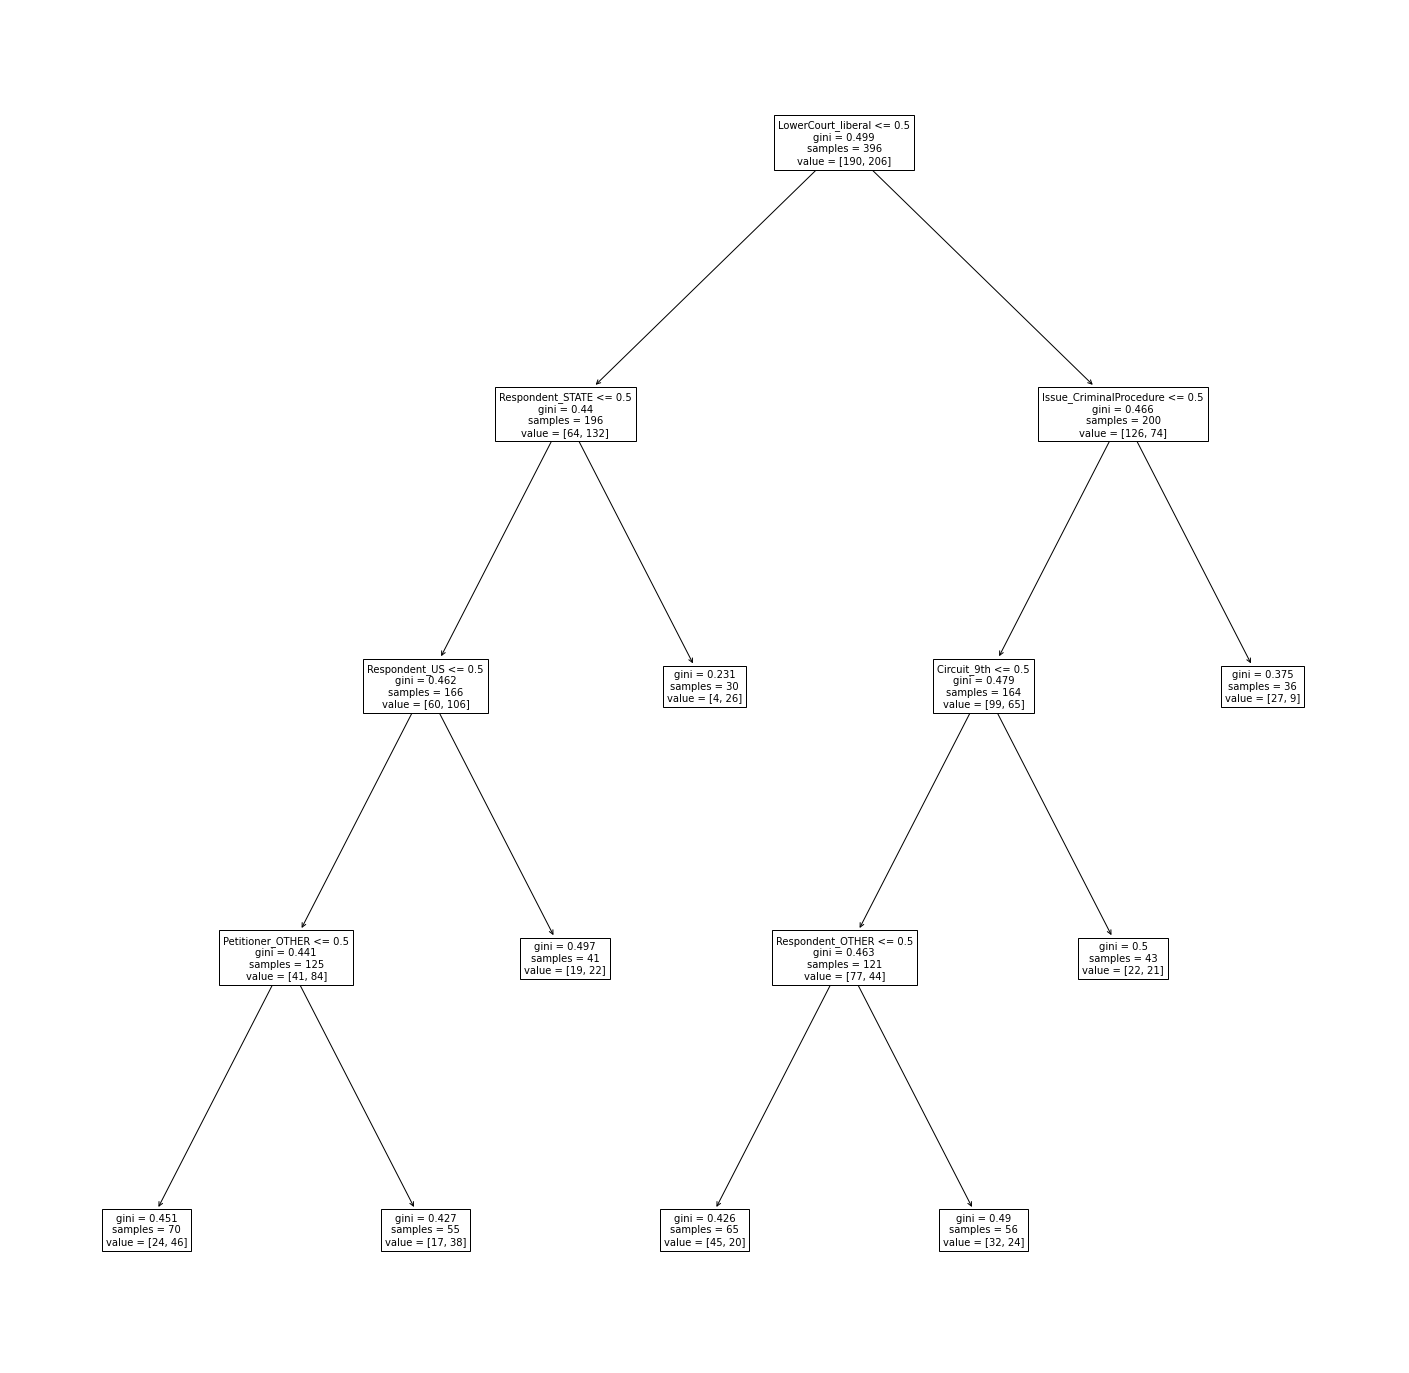

In [ ]:
fig = plt.figure(figsize=(25,25))                                     # create a space of size 25,25 for a graph  
plot_tree(model, fontsize=10, feature_names=x_train.columns.values)   # plot the model in the tree within that figure space

ROC AUC score: 0.6998985654253007


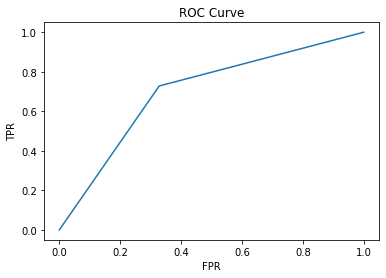

In [ ]:
print(f'ROC AUC score: {metrics.roc_auc_score(y_test,y_pred)}')       # calculate the roc score
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred)                          # get the lines for False Positive Rate, True Positive Rate
plt.plot(fpr,tpr)                                                     # plot the FPR and TPR
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [ ]:
ccp_options = np.linspace(0.01,0.5,50)                          # creating a range of cpp_alpha values to test
accuracy_train, accuracy_test = [], []                                

for cpp in ccp_options:
  tree = DecisionTreeClassifier(ccp_alpha = cpp)                # testing out different options for ccp_alpha
  tree.fit(x_train,y_train)
  y_train_pred=tree.predict(x_train)
  y_test_pred=tree.predict(x_test)

  accuracy_train.append(metrics.accuracy_score(y_train,y_train_pred))
  accuracy_test.append(metrics.accuracy_score(y_test,y_test_pred))

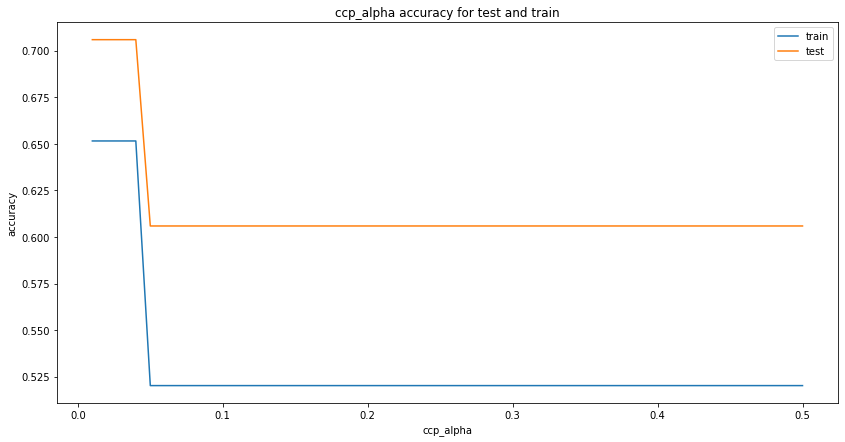

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(ccp_options,accuracy_train)
plt.plot(ccp_options,accuracy_test)
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.title('ccp_alpha accuracy for test and train')
plt.show()

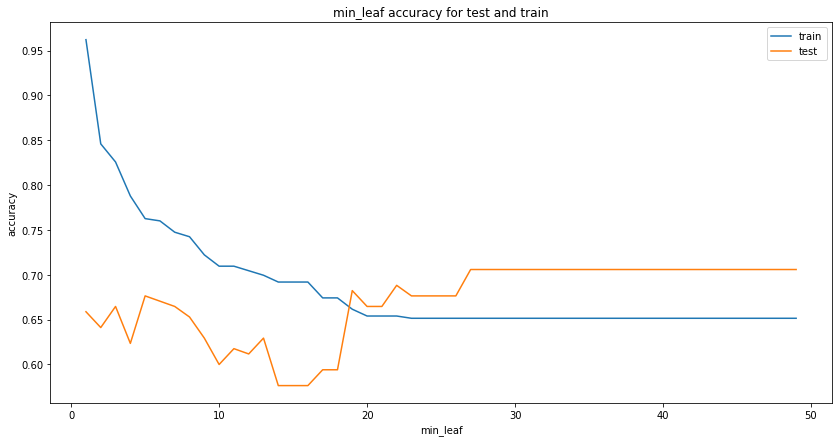

In [ ]:
min_leaf = range(1,50,1)                          # creating a range of cpp_alpha values to test
accuracy_train, accuracy_test = [], []                                

for size in min_leaf:
  tree = DecisionTreeClassifier(min_samples_leaf = size)                # testing out different options for min_samples_leaf
  tree.fit(x_train,y_train)
  y_train_pred=tree.predict(x_train)
  y_test_pred=tree.predict(x_test)

  accuracy_train.append(metrics.accuracy_score(y_train,y_train_pred))
  accuracy_test.append(metrics.accuracy_score(y_test,y_test_pred))

plt.figure(figsize=(14,7))
plt.plot(min_leaf,accuracy_train)
plt.plot(min_leaf,accuracy_test)
plt.xlabel('min_leaf')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.title('min_leaf accuracy for test and train')
plt.show()

In [ ]:
print(f'confusion matrix: \n{metrics.confusion_matrix(y_test, y_pred)}')
print(f'classification report: \n{metrics.classification_report(y_test, y_pred)}')

confusion matrix: 
[[45 22]
 [28 75]]
classification report: 
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        67
           1       0.77      0.73      0.75       103

    accuracy                           0.71       170
   macro avg       0.69      0.70      0.70       170
weighted avg       0.71      0.71      0.71       170



In [ ]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=25)        # create an instance of the RF class object; arguments are passed to when creating the instance
tree = rf.fit(x_train,y_train)                                             
y_pred = tree.predict(x_test)                                             
print(f'confusion matrix: \n{metrics.confusion_matrix(y_test, y_pred)}')
print(f'classification report: \n{metrics.classification_report(y_test, y_pred)}')

confusion matrix: 
[[51 30]
 [25 64]]
classification report: 
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        81
           1       0.68      0.72      0.70        89

    accuracy                           0.68       170
   macro avg       0.68      0.67      0.67       170
weighted avg       0.68      0.68      0.68       170



# **Clustering - Hierarchal**

In [ ]:
df = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
data = df.iloc[:, 1:5].values                               # create a np array from specified rows and values
data[:,0] = np.where(data[:,0] == 'Male',1,0)               # change the male/female categorical variable into a number binary

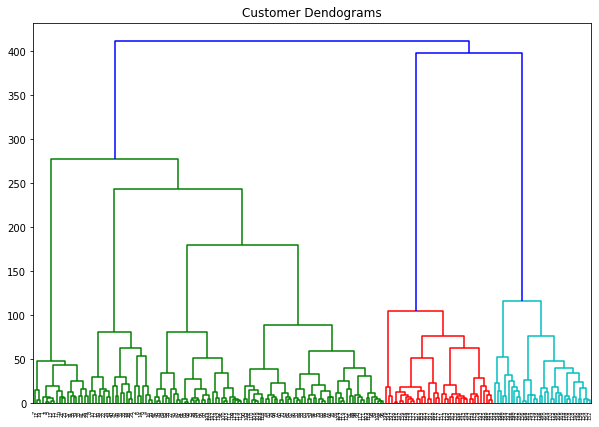

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
links = linkage(data,metric='euclidean',method='ward')      # perform hierarchical/agglomerative clustering, can specify distance measure and method of comparing clusters
dend = dendrogram(links)                                    # create dendrogram

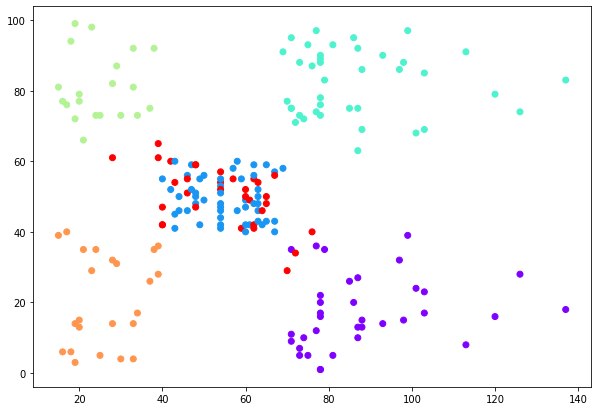

In [ ]:
clusters = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
clusters.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,2], data[:,3], c=clusters.labels_, cmap='rainbow')

**MISC**

In [ ]:
df.columns = ['Timestamp', 'Price']                 # change heading of columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])   # apply the 'to_datetime' function to column 'Timestamp' to parse those values to datetime
df.set_index('Timestamp', inplace=True)             # define column 'Timestamp' as the index column

In [ ]:
plt.plot(df.index, df['Price'])                     # create plot with x, y arrays
plt.title('Name')                                   # change title of the global chart
plt.figure(figsize=(12,6))                          # edit only the specified figure
# DecisionTreeRegressor 
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))